## Informasi Mahasiswa

Nama : Ulan Sawalia

NPM  : 2108107010024

Dataset

dataset yang saya ambil berasal dari Kaggle: https://www.kaggle.com/datasets/yasserh/heart-disease-dataset/data 

dataset ini memprediksi penyakit jantung dengan 14 atribut

*Informasi Atribut: 
1. age	(umur dalam tahun)
2. sex  ((1 = laki-laki; 0 = perempuan))
3. cp (tipe nyeri dada)
   * 0 : Angina tipikal: nyeri dada berhubungan dengan penurunan suplai darah ke jantung
   * 1 : Angina atipikal: nyeri dada yang tidak berhubungan dengan jantung
   * 2 : Nyeri non-angina: biasanya kejang esofagus (tidak berhubungan dengan jantung)
   * 3 : Tanpa gejala : nyeri dada tidak menunjukkan tanda-tanda penyakit
4. trestbps (tekanan darah istirahat (dalam mm Hg saat masuk rumah sakit) - angka di atas 130-140 biasanya menimbulkan kekhawatiran)
5. chol (kolesterol serum dalam mg/dl - serum = LDL + HDL + 0,2 * trigliserida - di atas 200 patut dikhawatirkan)
6. fbs ((gula darah puasa > 120 mg/dl) (1 = benar; 0 = salah) - '>126' mg/dL menandakan diabetes)
7. restecg (hasil elektrokardiografi istirahat)
   * 0 : Tidak ada yang perlu diperhatikan
   * 1 : Kelainan Gelombang ST-T - dapat berkisar dari gejala ringan hingga masalah parah - menandakan detak jantung tidak normal
   * 2 : Kemungkinan atau pasti hipertrofi ventrikel kiri - Pembesaran ruang pompa utama jantung

8. thalach	(detak jantung maksimum tercapai)
9. exang (angina akibat olahraga (1 = ya; 0 = tidak))
10. oldpeak (Depresi ST yang disebabkan oleh olahraga dibandingkan dengan istirahat - melihat stres jantung saat berolahraga - jantung yang tidak sehat akan lebih stres)
11. slope (kemiringan puncak latihan segmen ST)
     * 0 : Menanjak: detak jantung lebih baik dengan olahraga (jarang)
     * 1 : Miring datar: perubahan minimal (tipikal jantung sehat)
     * 2 : Menurun: tanda-tanda jantung tidak sehat
12. ca	(ngiografi koroner - jumlah pembuluh darah besar (0-3) yang diwarnai dengan fluoroskopi - pembuluh darah berwarna berarti dokter dapat melihat darah yang melewatinya - semakin banyak pergerakan darah semakin baik (tidak ada gumpalan))
13. thal (hasil stres talium)
14. target (menderita penyakit atau tidak (1=ya, 0=tidak) (= atribut yang diprediksi))

Studi Kasus : Memprediksi penyebab penyakit jantung

## Import Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [2]:
data = pd.read_csv("heart.csv")
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

## Split to train and test data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

Data dibagi menjadi data train dan test set dengan perbandingan 80% training dan 20% testing

## Data preprocessing

In [5]:
# cek missing value
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


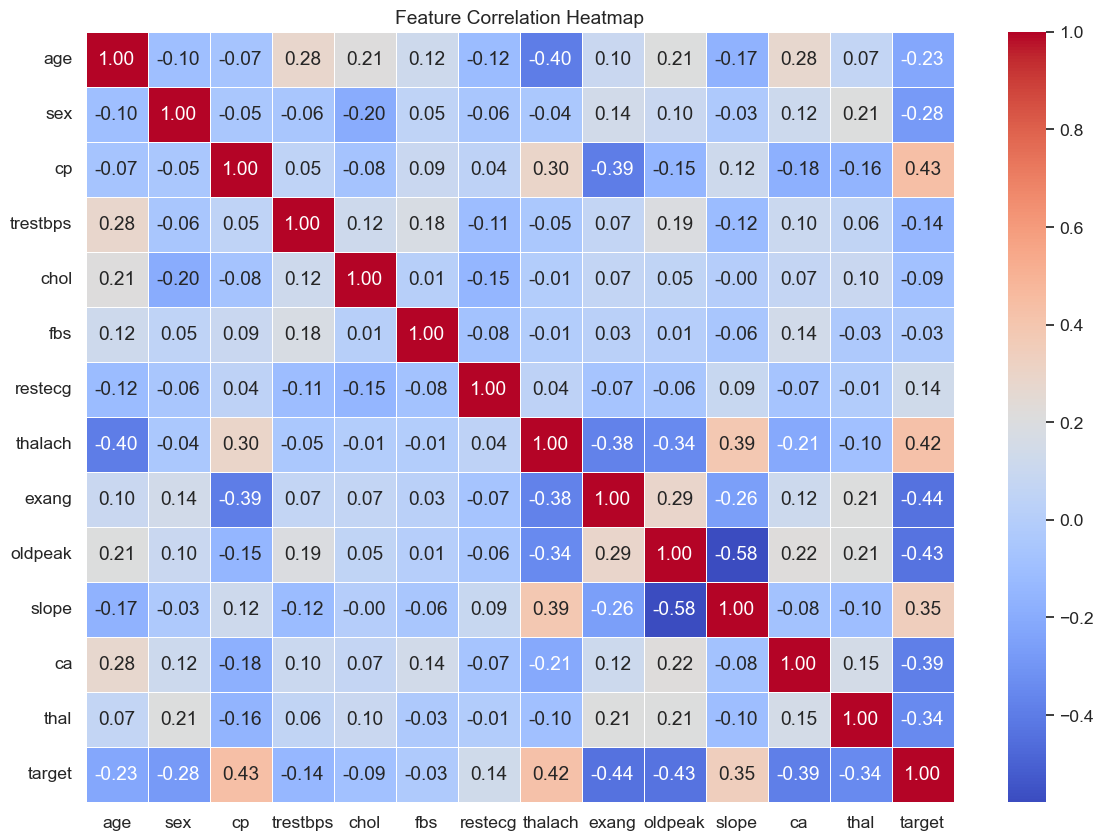

In [7]:
# Set font scale
sns.set(font_scale=1.15)

# Create correlation matrix
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


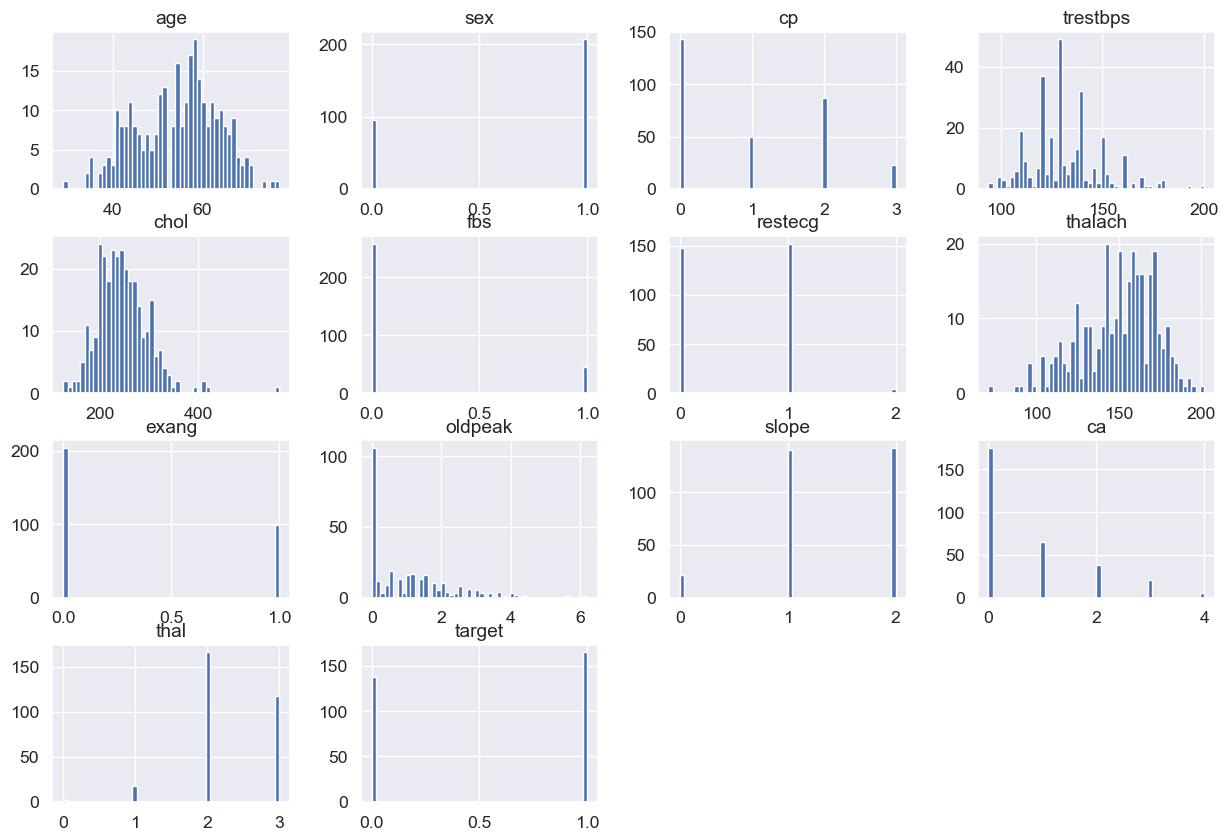

In [8]:
# Numerical
data.hist(bins=50, figsize=(15, 10))
plt.show()

C:\Users\Acer-TC\AppData\Local\Temp\ipykernel_7504\4190987176.py:8: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.histplot(data=data, x=name, hue="target", kde=True, palette=custom_palette)
C:\Users\Acer-TC\AppData\Local\Temp\ipykernel_7504\4190987176.py:8: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.histplot(data=data, x=name, hue="target", kde=True, palette=custom_palette)
C:\Users\Acer-TC\AppData\Local\Temp\ipykernel_7504\4190987176.py:8: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.histplot(data=data, x=name, hue="target", kde=True, palette=custom_palette)
C:\Users\Acer-TC\AppData\Local\Temp\ipykernel_7504\4190987176.py:8: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.histplot(data=data, x=name, hue="target", kde=True, palette=custom_palette)
C:\Users\Acer-TC\App

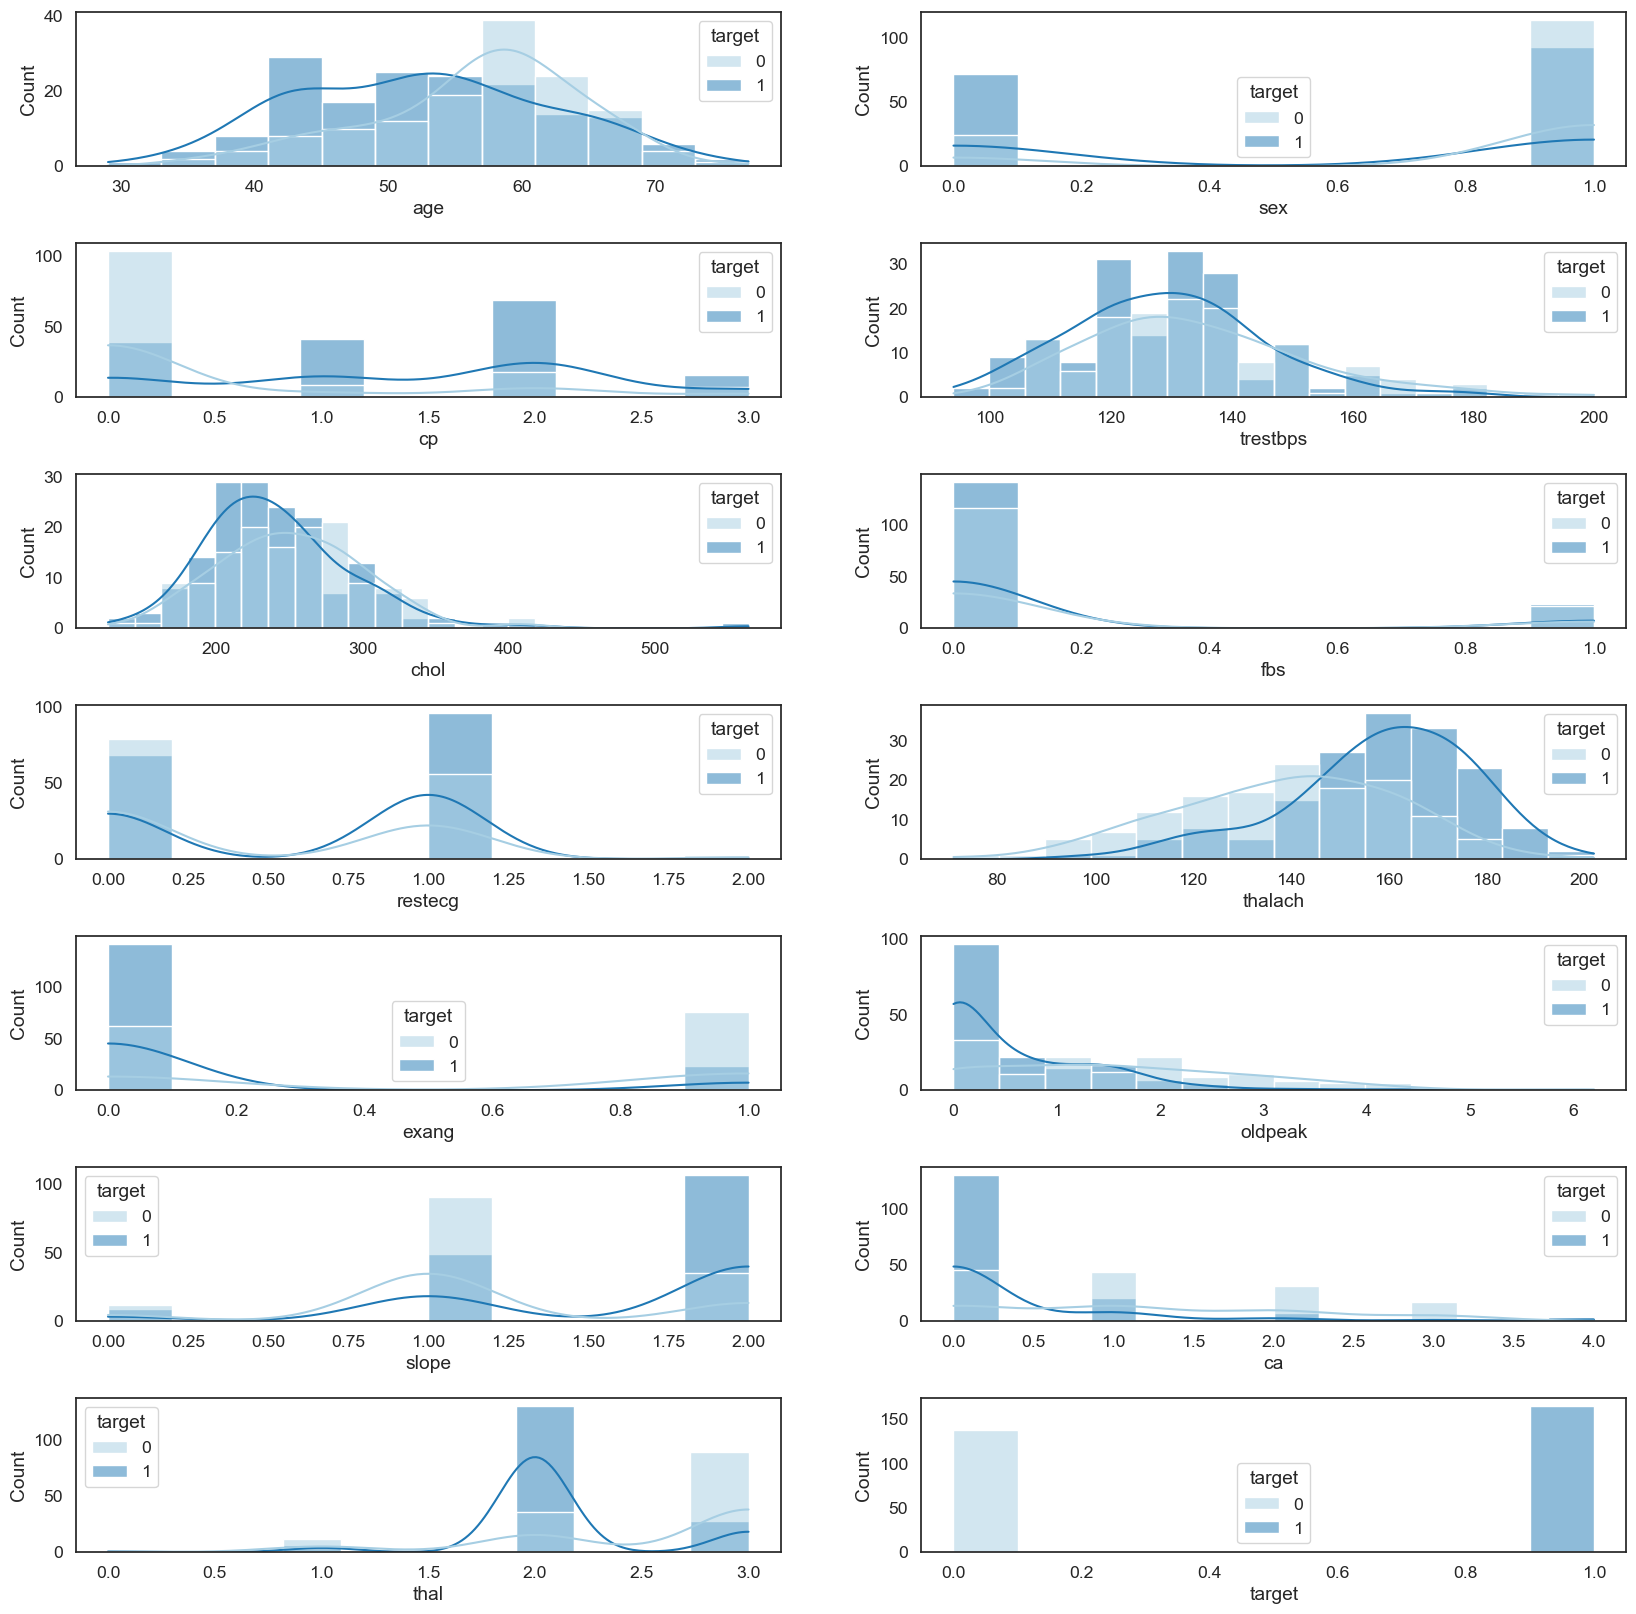

In [9]:
plt.figure(figsize=(20, 20))
sns.set_style("white")
custom_palette = sns.color_palette("Paired")  # Menggunakan palet warna 'Paired'
plt.subplots_adjust(hspace=0.5)
i = 1
for name in data.columns:
    plt.subplot(7, 2, i)
    sns.histplot(data=data, x=name, hue="target", kde=True, palette=custom_palette)
    i += 1
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Membangun Model

In [11]:
# Build neural network

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=32, activation="relu"))
ann.add(tf.keras.layers.Dense(units=32, activation="relu"))
#ann.add(tf.keras.layers.Dense(units=26, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [12]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9770 - loss: 0.0871 - val_accuracy: 0.8361 - val_loss: 0.4926
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9704 - loss: 0.0895 - val_accuracy: 0.8361 - val_loss: 0.4978
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9842 - loss: 0.0760 - val_accuracy: 0.8361 - val_loss: 0.5004
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9916 - loss: 0.0772 - val_accuracy: 0.8361 - val_loss: 0.5051
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9902 - loss: 0.0801 - val_accuracy: 0.8361 - val_loss: 0.5074
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9876 - loss: 0.0736 - val_accuracy: 0.8197 - val_loss: 0.5116
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9908 - loss: 0.0684 - val_accuracy: 0.8361 - val_loss: 0.5142
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9903 - loss: 0.0724 - val_accuracy: 0.8361 - val_loss: 0.

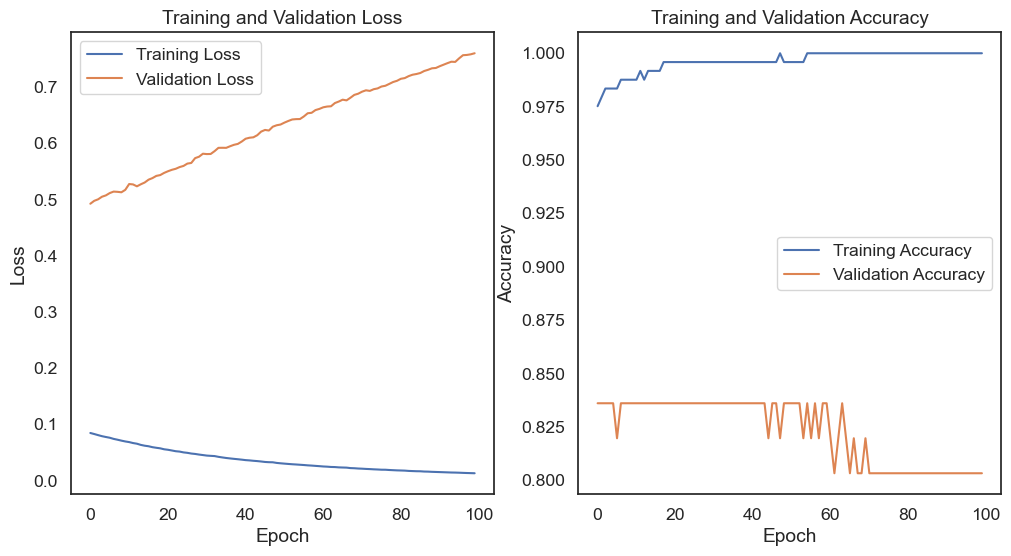

In [15]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

# Plot loss dan validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy dan validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [16]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy score: ",accuracy_score(y_test,y_pred))


[[21  6]
 [ 6 28]]
Accuracy score:  0.8032786885245902


In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# metrics evaluasi
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi: {akurasi*100:.2f}%')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall*100:.2f}%')
presisi = precision_score(y_test, y_pred)
print(f'Presisi: {presisi*100:.2f}%')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1*100:.2f}%')

Akurasi: 80.33%
Recall: 82.35%
Presisi: 82.35%
F1 Score: 82.35%


Dari hasil prediksi dengan data uji, diperoleh beberapa metrik evaluasi performa model. Berikut adalah hasilnya:

Akurasi (Accuracy): 83.61%

Akurasi merupakan persentase dari jumlah prediksi yang benar dibandingkan dengan total jumlah prediksi. Dalam konteks ini, model berhasil memprediksi kelas dengan benar sebesar 88.24%.
Recall: 88.24%

Recall mengukur kemampuan model dalam mengidentifikasi semua positif yang sebenarnya. Dalam konteks ini, model dapat mengidentifikasi 88.24% dari semua kasus positif yang sebenarnya.
Presisi (Precision): 88.24%

83.33% dari semua prediksi positif yang dilakukan oleh model adalah benar.
F1 Score: 83.33%

F1 Score merupakan harmonic mean dari recall dan presisi. Ini memberikan indikasi tentang keseimbangan antara recall dan presisi. Semakin tinggi nilai F1 Score, semakin baik performa model dalam menghasilkan prediksi yang tepat dan mengidentifikasi instance positif dengan baik.